In [9]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")
POLmonthyearERC = pd.read_csv('queries_results/Poland/POL_FRA/POL-FRA monthyear eventRC count SUMaTone AVGaTonne.csv', header = 0,sep=' *, *', dtype={'EventRootCode':str})
POLmonthyearERC["Time"]=pd.to_datetime(POLmonthyearERC['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')
eventcodes = pd.read_csv('cameo.csv', header = 0,dtype =str, sep=' *, *')
POLmonthyearERC = POLmonthyearERC.merge(eventcodes.set_index('CAMEOEVENTCODE'), left_on='EventRootCode',right_on='CAMEOEVENTCODE', how='left')

POLmonthyearAc2 = pd.read_csv('queries_results/Poland/POL monthyear ac2 count.csv', header = 0,sep=' *, *')
POLmonthyearAc2["Time"]=pd.to_datetime(POLmonthyearAc2['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')


/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.
/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  del sys.p

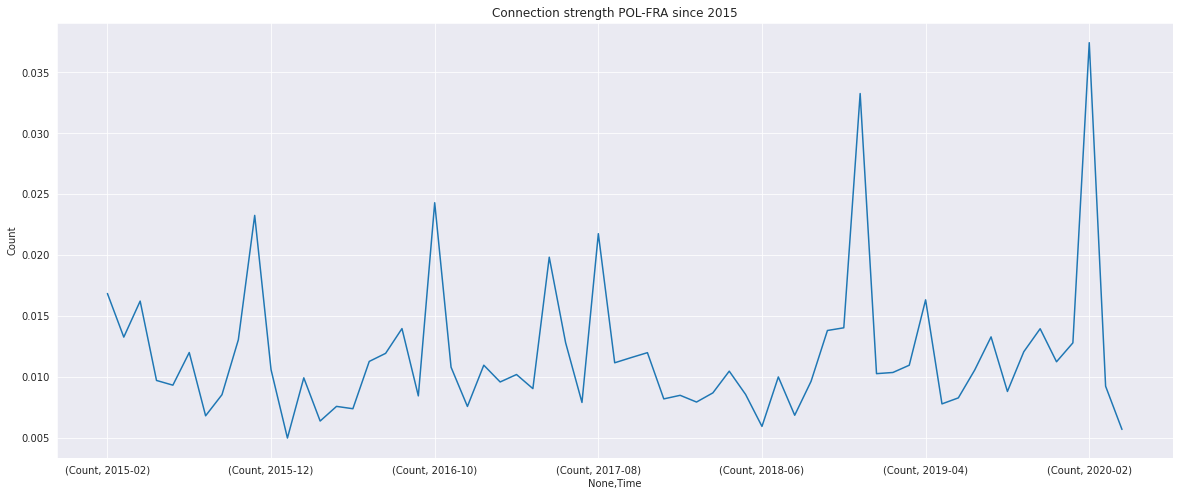

In [10]:
s = POLmonthyearERC.groupby(["Time"]).agg({'Count':'sum'})
t = POLmonthyearAc2.groupby(["Time"]).agg({'Count':'sum'})
s['Count']=s['Count']/t['Count']
g = s.unstack().plot(y='Count',x='Time')
g.set(ylabel='Count')
g.set_title("Connection strength POL-FRA since 2015")
g.figure.set_size_inches(20,8)